In [ ]:
### THIS IS THE UPDATED VERSION FOR 2024 ###

In [2]:
import pandas as pd

/var/folders/6f/h59wcfgd5r3dsh60jmr_9zg80000gn/T/ipykernel_76139/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
mvps = pd.read_csv("mvps.csv")

# note: did some manual editing via excel to merge the ranked-choice voting shift from 2022 onwards

In [4]:
# get rid of cols we don't need (already in players or defensive players csv)

mvps = mvps[["Pos", "Player", "Tm", "Year", "Votes", "Share"]]

In [5]:
mvps

,Pos,Player,Tm,Year,Votes,Share
0,QB,Brett Favre,Green Bay Packers,1996,52.0,55.9%
1,QB,John Elway,Denver Broncos,1996,33.5,36%
2,RB,Terrell Davis,Denver Broncos,1996,5.5,5.9%
3,RB,Jerome Bettis,Pittsburgh Steelers,1996,2.0,2.2%
4,QB,Brett Favre,Green Bay Packers,1997,18.0,37.5%
...,...,...,...,...,...,...
120,WR,Tyreek Hill,Miami Dolphins,2023,60.0,5.7%
121,QB,Patrick Mahomes,Kansas City Chiefs,2023,12.0,1.1%
122,QB,Matthew Stafford,Los Angeles Rams,2023,4.0,0.4%
123,QB,C.J. Stroud,Houston Texans,2023,4.0,0.4%


In [6]:
players = pd.read_csv("players.csv")

In [7]:
# rename players cols
players.columns = ["Index", "Rk", "Player", "Tm", "Pos", "Age",
                   "Games G", "Games GS",
                   "Passing Cmp", "Passing Att", "Passing Yds", "Passing TD", "Passing Int",
                   "Rushing Att", "Rushing Yds", "Rushing Y/A", "Rushing TD",
                   "Receiving Tgt", "Receiving Rec", "Receiving Yds", "Receiving Y/R", "Receiving TD",
                   "Fumbles Fmb", "Fumbles FL",
                   "Scoring TD", "Scoring 2PM", "Scoring 2PP",
                   "Fantasy FantPt", "Fantasy PPR", "Fantasy DKPt", "Fantasy FDPt", "Fantasy VBD", "Fantasy PosRank", "Fantasy OvRank",
                   "Year"]

# # remove 1st row
# players = players.drop([0])

In [8]:
del players["Index"]
del players["Rk"]

# not all players have fantasy position & overall ranks
del players["Fantasy PosRank"]
del players["Fantasy OvRank"]

In [9]:
# we want to merge players & mvps data, need to standardize naming to merge

# some player names have "*" & "+"
# use str.replace to replace "*" w/ nothing
# regex=False --> don't use regular expressions, treat as regular asterik
players["Player"] = players["Player"].str.replace("*", "", regex=False)
players["Player"] = players["Player"].str.replace("+", "", regex=False)

In [10]:
# iterate through each group & make sure each group has 1 row
def single_row(df):
    # if only played for 1 team in 1 year, don't need to do any processing
    if df.shape[0] == 1:
        return None
    # if had multiple teams in 1 year
    else:
        # add df to multiple_rows df
        return df

multiple_rows = players.groupby(["Player", "Age", "Year"]).apply(single_row)

/var/folders/6f/h59wcfgd5r3dsh60jmr_9zg80000gn/T/ipykernel_76139/2820674770.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  multiple_rows = players.groupby(["Player", "Age", "Year"]).apply(single_row)


In [11]:
multiple_rows

Player   Tm      Pos  Age Games G Games GS  \
Player      Age Year                                                            
Dalvin Cook 28  2023.0 16603  Dalvin Cook  NYJ       RB   28      15        1   
                       16604  Dalvin Cook  BAL       RB   28       0        0   
Dan Chisena 26  2023.0 16852  Dan Chisena  ARI       WR   26       4        0   
                       16853  Dan Chisena  BAL       WR   26       0        0   
Player      Age 1996.0 30          Player   Tm  FantPos  Age       G       GS   
...                                   ...  ...      ...  ...     ...      ...   
                2024.0 17443       Player   Tm  FantPos  Age       G       GS   
                       17474       Player   Tm  FantPos  Age       G       GS   
                       17505       Player   Tm  FantPos  Age       G       GS   
                       17536       Player   Tm  FantPos  Age       G       GS   
                       17567       Player   Tm  FantPos  Age       G       GS   

                             Passing Cmp Passing Att Passing Yds Passing TD  \
Player      Age Year                                                          
Dalvin Cook 28  2023.0 16603           0           0           0          0   
                       16604         NaN         NaN         NaN        NaN   
Dan Chisena 26  2023.0 16852           0           0           0          0   
                       16853         NaN         NaN         NaN        NaN   
Player      Age 1996.0 30            Cmp         Att         Yds         TD   
...                                  ...         ...         ...        ...   
                2024.0 17443         Cmp         Att         Yds         TD   
                       17474         Cmp         Att         Yds         TD   
                       17505         Cmp         Att         Yds         TD   
                       17536         Cmp         Att         Yds         TD   
                       17567         Cmp         Att         Yds         TD   

                              ... Fumbles FL Scoring TD Scoring 2PM  \
Player      Age Year          ...                                     
Dalvin Cook 28  2023.0 16603  ...          2          0         NaN   
                       16604  ...        NaN          0         NaN   
Dan Chisena 26  2023.0 16852  ...          0          0         NaN   
                       16853  ...        NaN          0         NaN   
Player      Age 1996.0 30     ...         FL         TD         2PM   
...                           ...        ...        ...         ...   
                2024.0 17443  ...         FL         TD         2PM   
                       17474  ...         FL         TD         2PM   
                       17505  ...         FL         TD         2PM   
                       17536  ...         FL         TD         2PM   
                       17567  ...         FL         TD         2PM   

                             Scoring 2PP Fantasy FantPt Fantasy PPR  \
Player      Age Year                                                  
Dalvin Cook 28  2023.0 16603         NaN             25        40.2   
                       16604         NaN             25         NaN   
Dan Chisena 26  2023.0 16852         NaN            NaN         NaN   
                       16853         NaN            NaN         NaN   
Player      Age 1996.0 30            2PP         FantPt         PPR   
...                                  ...            ...         ...   
                2024.0 17443         2PP         FantPt         PPR   
                       17474         2PP         FantPt         PPR   
                       17505         2PP         FantPt         PPR   
                       17536         2PP         FantPt         PPR   
                       17567         2PP         FantPt         PPR   

                             Fantasy DKPt Fantasy FDPt Fantasy VBD    Year  
Player      Age Year        

In [12]:
# manually edit to remove dalvin cook bal row & dan chisena bal row (played 0 games)
players = players.drop([16853])
players = players.drop([16604])

In [13]:
players.groupby(["Player", "Age", "Year"]).get_group(("Dan Chisena", "26", 2023))

,Player,Tm,Pos,Age,Games G,Games GS,Passing Cmp,Passing Att,Passing Yds,Passing TD,...,Fumbles FL,Scoring TD,Scoring 2PM,Scoring 2PP,Fantasy FantPt,Fantasy PPR,Fantasy DKPt,Fantasy FDPt,Fantasy VBD,Year
16852,Dan Chisena,ARI,WR,26,4,0,0,0,0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023.0


In [14]:
players.groupby(["Player", "Age", "Year"]).get_group(("Dalvin Cook", "28", 2023))

,Player,Tm,Pos,Age,Games G,Games GS,Passing Cmp,Passing Att,Passing Yds,Passing TD,...,Fumbles FL,Scoring TD,Scoring 2PM,Scoring 2PP,Fantasy FantPt,Fantasy PPR,Fantasy DKPt,Fantasy FDPt,Fantasy VBD,Year
16603,Dalvin Cook,NYJ,RB,28,15,1,0,0,0,0,...,2,0,NaN,NaN,25,40.2,45.2,32.7,NaN,2023.0


In [15]:
# delete header rows
players = players[~players["Player"].str.contains("Player")]

In [16]:
defensive_players = pd.read_csv("defensive_players.csv")

In [25]:
del defensive_players["Unnamed: 0"]
del defensive_players["Rk"]

In [26]:
defensive_players["Player"] = defensive_players["Player"].str.replace("*", "", regex=False)
defensive_players["Player"] = defensive_players["Player"].str.replace("+", "", regex=False)

In [27]:
# delete header rows
defensive_players = defensive_players[~defensive_players["Player"].str.contains("Player")]

In [28]:
# merge dfs
combined_players = players.merge(defensive_players, how="outer", on=["Player", "Tm", "Pos", "Age", "Games G", "Games GS", "Year"])

In [29]:
# getting rid of fantasy columns
del combined_players["Fantasy FantPt"]
del combined_players["Fantasy PPR"]
del combined_players["Fantasy DKPt"]
del combined_players["Fantasy FDPt"]
del combined_players["Fantasy VBD"]

In [30]:
# replace NaN's w/ 0's
combined_players[["Passing Cmp", "Passing Att", "Passing Yds", "Passing TD", "Passing Int", "Rushing Att", "Rushing Yds", "Rushing Y/A", "Rushing TD", "Receiving Tgt", "Receiving Rec", "Receiving Yds", "Receiving Y/R", "Receiving TD", "Fumbles Fmb", "Fumbles FL", "Scoring TD", "Scoring 2PM", "Scoring 2PP", "Int", "Sk", "Tackles Comb", "Tackles Solo", "Tackles Ast"]] = combined_players[["Passing Cmp", "Passing Att", "Passing Yds", "Passing TD", "Passing Int", "Rushing Att", "Rushing Yds", "Rushing Y/A", "Rushing TD", "Receiving Tgt", "Receiving Rec", "Receiving Yds", "Receiving Y/R", "Receiving TD", "Fumbles Fmb", "Fumbles FL", "Scoring TD", "Scoring 2PM", "Scoring 2PP", "Int", "Sk", "Tackles Comb", "Tackles Solo", "Tackles Ast"]].fillna(0)

In [31]:
combined_players.to_csv("combined_players.csv")

In [32]:
### ONLY RUN THIS LINE IF USING MODIFIED VERISON W/O DEFENSIVE PLAYERS ###

# if only looking at offensive players w/o defensive players, do not merge players w/ defensive players
combined_players = players

# replace NaN's w/ 0's
combined_players[["Passing Cmp", "Passing Att", "Passing Yds", "Passing TD", "Passing Int", "Rushing Att", "Rushing Yds", "Rushing Y/A", "Rushing TD", "Receiving Tgt", "Receiving Rec", "Receiving Yds", "Receiving Y/R", "Receiving TD", "Fumbles Fmb", "Fumbles FL", "Scoring TD", "Scoring 2PM", "Scoring 2PP"]] = combined_players[["Passing Cmp", "Passing Att", "Passing Yds", "Passing TD", "Passing Int", "Rushing Att", "Rushing Yds", "Rushing Y/A", "Rushing TD", "Receiving Tgt", "Receiving Rec", "Receiving Yds", "Receiving Y/R", "Receiving TD", "Fumbles Fmb", "Fumbles FL", "Scoring TD", "Scoring 2PM", "Scoring 2PP"]].fillna(0)

In [33]:
nicknames = {}

with open("nicknames.csv") as f:
    lines = f.readlines()
    # skip row 0 since header row ([1: ] means from row 1 onwards)
    for line in lines[1: ]:
        abbrev, name = line.replace("\n", "").split(",")
        nicknames[abbrev] = name

In [34]:
# converts Tm column into full team names
combined_players["Team"] = combined_players["Tm"].map(nicknames)

In [35]:
# rename mvps "Tm" column to "Team" to match combined_players
mvps = mvps.rename(columns={"Tm" : "Team"})

In [36]:
# merge dfs
combined = combined_players.merge(mvps, how="outer", on=["Player", "Pos", "Team", "Year"])

In [37]:
# replace NaN's w/ 0's
combined[["Votes", "Share"]] = combined[["Votes", "Share"]].fillna(0)

In [38]:
teams = pd.read_csv("teams.csv")

In [39]:
del teams["Unnamed: 0"]

In [40]:
# rename mvps "Tm" column to "Team" to match combined
teams = teams.rename(columns={"Tm" : "Team"})

In [41]:
teams["Team"] = teams["Team"].str.replace("*", "", regex=False)
teams["Team"] = teams["Team"].str.replace("+", "", regex=False)

In [42]:
# delete header rows
teams = teams[~teams["Team"].str.contains("AFC East")]
teams = teams[~teams["Team"].str.contains("AFC Central")]
teams = teams[~teams["Team"].str.contains("AFC West")]

teams = teams[~teams["Team"].str.contains("AFC North")]
teams = teams[~teams["Team"].str.contains("AFC South")]

teams = teams[~teams["Team"].str.contains("NFC East")]
teams = teams[~teams["Team"].str.contains("NFC Central")]
teams = teams[~teams["Team"].str.contains("NFC West")]

teams = teams[~teams["Team"].str.contains("NFC North")]
teams = teams[~teams["Team"].str.contains("NFC South")]

In [43]:
# replace washington commanders team name so that all WAS goes to correct team
teams["Team"] = teams["Team"].replace("Washington Redskins", "Washington Commanders")
teams["Team"] = teams["Team"].replace("Washington Football Team", "Washington Commanders")

# replace houston oilers team name so that all HOU goes to correct team
teams["Team"] = teams["Team"].replace("Houston Oilers", "Houston Texans")

# replace tennessee oilers team name so that all TEN goes to correct team
teams["Team"] = teams["Team"].replace("Tennessee Oilers", "Tennessee Titans")

In [44]:
# verify replaced all
print(sum(teams["Team"] == "Washington Redskins"))
print(sum(teams["Team"] == "Washington Football Team"))
print(sum(teams["Team"] == "Houston Oilers"))
print(sum(teams["Team"] == "Tennessee Oilers"))

0
0
0
0


In [45]:
# for every row in combined, we add row from teams that corresponds to win/loss record
stats = combined.merge(teams, how="outer", on=["Team", "Year"])

# if number of rows stays the same, usually indicates merge went well
# stats & combined have same number of rows

In [ ]:
stats

In [ ]:
combined

In [48]:
# replace NaN's w/ 0's
stats[["W", "L", "T", "W-L%", "PF", "PA", "PD", "MoV", "SoS", "SRS", "OSRS", "DSRS"]] = stats[["W", "L", "T", "W-L%", "PF", "PA", "PD", "MoV", "SoS", "SRS", "OSRS", "DSRS"]].fillna(0)

In [49]:
# get rid of "%" in share column
stats["Share"] = stats["Share"].str.replace("%", "", regex=False)

In [50]:
# convert all numeric values to numeric types
stats = stats.apply(pd.to_numeric, errors="ignore")

/var/folders/6f/h59wcfgd5r3dsh60jmr_9zg80000gn/T/ipykernel_76139/2652470226.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  stats = stats.apply(pd.to_numeric, errors="ignore")


In [51]:
# convert share column to decimal
stats["Share"] = stats["Share"]/100

In [52]:
stats.dtypes

Player             object
Tm                 object
Pos                object
Age               float64
Games G           float64
Games GS          float64
Passing Cmp       float64
Passing Att       float64
Passing Yds       float64
Passing TD        float64
Passing Int       float64
Rushing Att       float64
Rushing Yds       float64
Rushing Y/A       float64
Rushing TD        float64
Receiving Tgt     float64
Receiving Rec     float64
Receiving Yds     float64
Receiving Y/R     float64
Receiving TD      float64
Fumbles Fmb       float64
Fumbles FL        float64
Scoring TD        float64
Scoring 2PM       float64
Scoring 2PP       float64
Fantasy FantPt    float64
Fantasy PPR       float64
Fantasy DKPt      float64
Fantasy FDPt      float64
Fantasy VBD       float64
Year              float64
Team               object
Votes             float64
Share             float64
W                   int64
L                   int64
W-L%              float64
PF                  int64
PA          

In [53]:
stats.to_csv("player_mvp_stats.csv")

In [54]:
highest_scoring = stats.sort_values("Passing TD", ascending=False).head(10)

<AxesSubplot:xlabel='Player'>

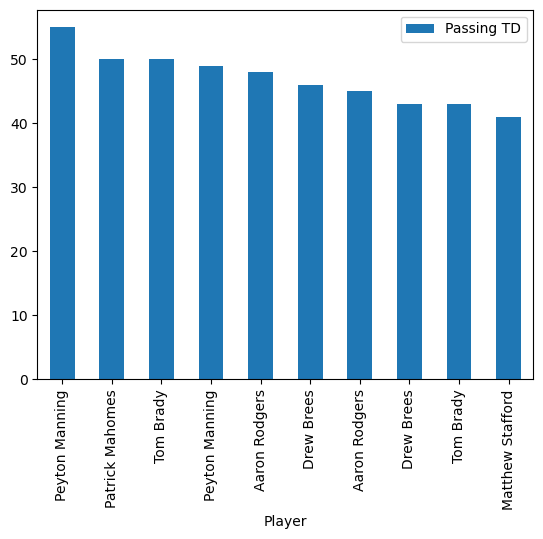

In [55]:
highest_scoring.plot.bar("Player", "Passing TD")

In [56]:
stats.corr(numeric_only=True)["Share"]

Age               0.171027
Games G           0.023637
Games GS          0.087677
Passing Cmp       0.194841
Passing Att       0.182044
Passing Yds       0.226303
Passing TD        0.392813
Passing Int       0.080503
Rushing Att      -0.080983
Rushing Yds      -0.058591
Rushing Y/A      -0.082219
Rushing TD        0.001524
Receiving Tgt    -0.179805
Receiving Rec    -0.179030
Receiving Yds    -0.188323
Receiving Y/R    -0.226326
Receiving TD     -0.130929
Fumbles Fmb      -0.057039
Fumbles FL       -0.134307
Scoring TD       -0.054714
Scoring 2PM      -0.027496
Scoring 2PP      -0.094012
Fantasy FantPt    0.505479
Fantasy PPR       0.358006
Fantasy DKPt      0.371656
Fantasy FDPt      0.459093
Fantasy VBD       0.272704
Year             -0.041466
Votes             0.262842
Share             1.000000
W                 0.395206
L                -0.409765
W-L%              0.410013
PF                0.507800
PA                0.020070
PD                0.429634
MoV               0.434240
S